# Notes: [Thresholds in a nonlinear integrate-and-fire model](https://neuronaldynamics.epfl.ch/online/Ch5.S1.html)

General ***nonlinear*** __integrate-and-fire model__ with a single variable $u$

$$\tau \frac{\mathrm{d}}{\mathrm{d} t} u=f(u)+R(u) I$$


In the experimental literature, the critical current $I_c=\theta_{rh}/R$ is called the **rheobase current**. In the mathematical literature, it is called the bifurcation point. Note that a stationary voltage $u>\theta_{rh}$ is not possible. On the other hand, for pulse inputs or time-dependent currents, voltage transients into the regime $\theta_{rh}<u(t)<\vartheta$ routinely occur without initiating a spike.

# Notes: [Exponential Integrate-and-Fire Model](https://neuronaldynamics.epfl.ch/online/Ch5.S2.html)

exponential integrate-and-fire model

$$\tau \frac{\mathrm{d}}{\mathrm{d} t} u=-(u-u_{rest})+\Delta_T \exp\left(\frac{u-\theta_{rh}}{\Delta T}\right)+R\ I$$


$\Delta_T$ sharpness parameter and $\vartheta_{rh}$ rheobase threshold

The rheobase threshold $\vartheta_{rh}$ indicates the maximal voltage that can be reached with constant current injection before the neuron starts repetitive firing.

# Codes: [Exponential Integrate-and-Fire Model](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/exponential-integrate-and-fire.html)

In [113]:
%matplotlib inline
import numpy as np
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

In [3]:
# help(exp_IF)

nr of spikes: 7


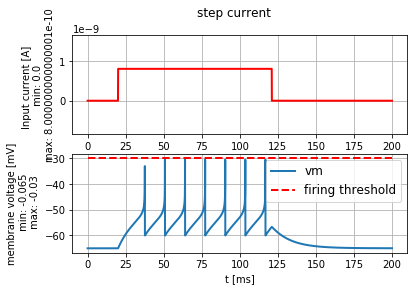

In [42]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [65]:
MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
V_REST = -65.0 * b2.mV
V_RESET = -60.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV
FIRING_THRESHOLD_v_spike = -30. * b2.mV

## Exercise: rehobase threshold

### Question

nr of spikes: 7


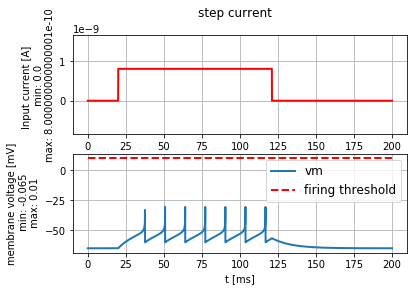

In [47]:
# object 1
FIRING_THRESHOLD_v_spike=10*b2.mV#override default value
input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)
state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms,
    v_spike=FIRING_THRESHOLD_v_spike)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

Also 7 spikes generated

In [232]:
RHEOBASE_THRESHOLD_v_rh

-55. * mvolt

In [295]:
V_REST+SHARPNESS_delta_T

-63. * mvolt

In [258]:
# object 2
# suppose at spike du/dt=0 (one dimension taylor expansion)
u=RHEOBASE_THRESHOLD_v_rh
fu=-(u-V_REST)+SHARPNESS_delta_T*b2.exp((u-RHEOBASE_THRESHOLD_v_rh)/SHARPNESS_delta_T)
Ic=-fu/MEMBRANE_RESISTANCE_R #greater than Ic litte bit

In [249]:
# from sympy.interactive import printing
# printing.init_printing(use_latex=True)
# from sympy import Eq,dsolve,Function,solve
# import sympy as sp
# t=sp.symbols('t')
# tau=MEMBRANE_TIME_SCALE_tau.__float__()
# urest=V_REST.__float__()
# ureset=V_RESET.__float__()
# DT=SHARPNESS_delta_T.__float__()
# thetarh=RHEOBASE_THRESHOLD_v_rh.__float__()
# R=MEMBRANE_RESISTANCE_R.__float__()
# v_spike=FIRING_THRESHOLD_v_spike.__float__()
# I=sp.symbols('I')
# u=sp.symbols('u',cls=Function)(t)
# diffeq=Eq(
#     u(t).diff(t),(-(u(t)-urest)+DT*sp.exp((u(t)-thetarh)/DT)+R*I)/tau)
# dsolve(diffeq,u(t),ics={u(20):urest,u(120):ureset})
# formulaleft=sp.integrate(tau/(-(u-urest)+DT*sp.exp((u-thetarh)/DT)+R*I),(u,urest,thetarh))
# result,_=solve(formulaleft-0.1,I)
# result=float(abs(result))# amp
# result

nr of spikes: 1


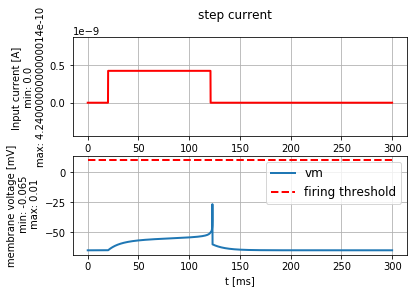

In [263]:
#object 3
FIRING_THRESHOLD_v_spike=10*b2.mV#override default value

input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=Ic+0.024*b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=300*b2.ms,
    v_spike=FIRING_THRESHOLD_v_spike)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## Exercise: strength-duration curve

### Question

nr of spikes: 1


Text(0, 0.5, 'min amplitude [nAmp]')

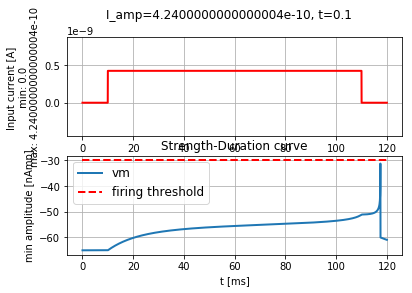

In [294]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

i=6  #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [8.58, 4.42, 1.93, 1.10, .70, .48, 0.424]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")